# 偏微分

微分の説明で$f(x) = x^2$ のような変数が1つの関数で説明しました。これを **1変数関数**　といいます。それに対して、複数の変数を持つ関数も存在します。
2変数以上の関数を **多変数関数** といいます。

多変数関数の場合も1変数関数のように微分を考えられますが、多変数の場合には少々込み入った事情が出て来ます。

まず多変数関数を見てみましょう。

$$f(x, y) = x^2 + y^2$$

これを可視化してみます。


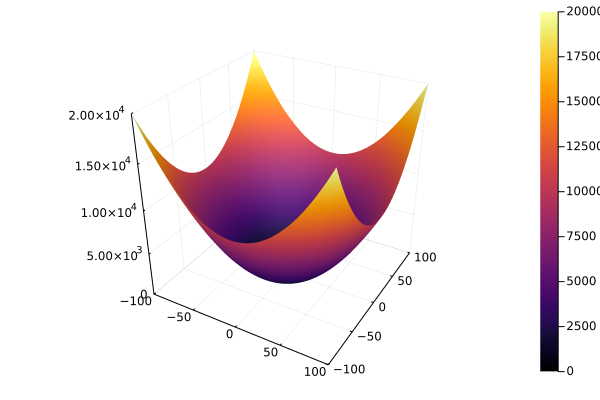

In [1]:
using Plots

N = 100

f(x, y) = x^2  + y^2

X = [x for x in -N:N]
Y = [y for y in -N:N]
Z = [f(x,y) for x in X, y in Y]

plot(X, Y, Z, st=:surface)

## 多変数関数の注意点

上のグラフは$x$軸が−100から100、$y$軸も-100から100までを描画しています。手前の軸を$x$軸、奥行きの軸を$y$軸とすれば$x,y$が定まれば3つ目の値$f(x,y )$が定まるため、3次元のグラフになります。

微分とは「とある瞬間の変化率」でした。それは「限りなくその点に近づける」という近似による操作で求めていましたが、偏微分の場合には少し困ったことが起きます。

それは「どのように近づけるか」です。1変数関数の場合には$x$を限りなく点$x_1$に近づけることで求めましたが、2変数の場合にはとある点として$(x_1, y_1)$に近づける必要があります。
$(x, y)$ を同時に$f(x_1, y_1)$に近づけることができればいいのですが、極限の操作は**一般的に一つずつしか操作できない**ため、$x$を$x_1$に近づけてから$y$を$y_1$に近づけるか、
その逆の$x$を$x_1$に近づけてから$y$を$y_1$に近づける必要が出て来ます。この2つの操作が一致すればめでたく微分可能となるのですが、一般的には**必ずしも一致しない**、もしくは**近づけられない**といったこともあります。

と、ここまで注意をしたものの、機械学習で使われる多変数関数の多くは、両者が一致します。
そのため、とりあえずは両者の操作が一致することを前提に話をすすめます。



## 偏微分

ようやく、偏微分の話に入ります。偏微分とは多変数関数の微分のことです。上述の注意の通り、$x$を近づけることと$y$を近づけるという操作は独立しています。
言い換えると、「$x$について微分する」ことと「$y$について微分する」ことは別々に考えます。


$f(x,y)$を$x$について微分した偏導関数を$f_{x}(x,y)$、$y$について微分したものを$f_{y}(x,y)$と表現します。
（別の少し複雑な表現の仕方がありますが、それはあとで紹介します。むしろそちらを使うことが多いです。）


注意点として、$f(x, y)$を$x$について微分する時、変数$y$を単なる定数として見なします。逆に$f(x,y)$を$y$について微分する時は$x$を定数として見なします。
要するに$x$について微分する時は単純に$x$に関する一変数関数の微分であり、$y$について微分する時は$y$に関する一変数関数の微分と考えます。

式で見ると、次のような感じです。

$$f_x(x,y) = \lim_{h \rightarrow 0} \frac{ f(x+h, y) - f(x, y)  }{h},f_y(x,y) = \lim_{h \rightarrow 0} \frac{ f(x, y+h) - f(x, y)  }{h}  $$

実際に先ほどの$f(x,y)=x^2 + y^2$ をJuliaで偏微分をして見ましょう。


In [3]:
# 近似するための限りなく小さい数
h = 0.000000000001

x = 1.0
y = 2.0

# f（x,y）のx=1における偏微分係数を求める
diff_y = f(x+h, y) - f(x, y)
result_x = diff_y / h
println("f(x, y)をxについて微分すると偏微分径数は", result_x)

# 今度はf(x, y)のyにおける微分を考える
diff_y = f(x, y+h) - f(x, y)
result_x = diff_y / h
println("f(x, y)をyについて微分すると偏微分係数", result_x)





f(x, y)をxについて微分すると偏微分径数は2.000177801164682
f(x, y)をyについて微分すると偏微分係数4.000355602329364


偏微分で求められる関数を**偏導関数**と言いますが、それぞれの偏導関数を求めてみましょう。初等関数の微分のときの公式を使います。

（あとで清書します）
<img src="./images/05/01.png" alt="Drawing" style="width: 500px;"/>

すると$f_{x}(x, y) = 2x, f_{y}(x,y)=2y$ というのがわかります。
微分は「瞬間の変化率」でしたので、これらも偏微分の結果も変化率です。
ただし1変数関数の場合は「接線の傾き」でしたが、今回の2変数関数の場合は「接平面の勾配」になります。
3変数以上の多変数関数では元の図形が4次元以上のグラフとなり可視化はできませんが、同じように変化率を求め、逸れに対応する変化率の勾配がみられます。

接平面の方程式は次のように求められます。

#### 公式: 接平面の関数

関数の$z=f(x,y)$の点$(x_0, y_0, z_0)$における接平面の方程式は

$$z =  f_x(x_0, y_0)(x-x_0) + f_y(x_0, y_0)(y-y_0) + z_0$$

により求めることができる。

実際に$x=1, y=2$における接平面を可視化してみましょう。

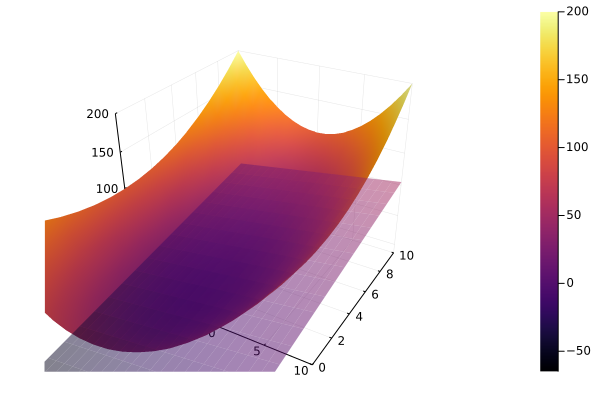

┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/umentu/.julia/packages/Plots/E2187/src/backends/gr.jl:519


In [4]:
using Plots


N = 10

# 近似するための限りなく小さい数
h = 0.000000000001

f(x, y) = x^2  + y^2

x_0 = 1.0
y_0 = 2.0

f_x = 0.0
f_y = 0.0


# f_x(x_0, y_0) を求める
diff_y = f(x_0+h, y_0) - f(x_0, y_0)
f_x = diff_y / h

# f_y(x_0, y_0) を求める
diff_y = f(x_0, y_0+h) - f(x_0, y_0)
f_y = diff_y / h



X = [x for x in -N:N]
Y = [y for y in -N:N]
Z = [f(x,y) for x in X, y in Y]

tan = function (x, y) 
    return f_x * (x -  x_0) + f_y * (y - y_0) + f(x_0, y_0)
end

plt = plot(X, Y, Z, st=:surface,  ylim=(0, 10))
plot!(plt, X, Y, tan, st=:surface, label="plane", alpha=0.5)


近似で$f_x$と$f_y$を求めているために正確な接平面ではありませんが、接平面の方程式である

$$z = 2 * (x - 1) + 4　 * (y - 2) + 5$$

に$x=1, y=2$を代入すれば$z=5$となり、座標$(1, 2, 5)$を通っていることがわかります。



今回の関数は2変数関数を話題にしましたが、実際の機械学習では持っとかずの多い多変数関数がたくさんでてきます。しかし考え方は同じです。

$$
\begin{aligned}
f(x_1, x_2, x_3, \dots, x_{n-1}, x_n) &= x_1 + 2x_2 + 3x_3 + \dots + i x_k + \dots  + (n-1) x_{n-1} + n x_n\\
                                      &= \sum_{i=1}^{n} i * x_i
\end{aligned}
$$

のように変数がn個の多変数関数が出て来ても、各変数だけに注目して微分します。例えば、k番目の変数$x_k$を微分すれば、$x_ik以外の変数はただの数値と見なすので、


$$
f_{x_k}(x_1, x_2, x_3, \dots, x_{n-1}, x_n) = k
$$

となります。



更に、$f(x, y)$を「$x$で微分してから$y$を微分する」ことを$f_{xy}$と表現し、$y$を微分してから$x$を微分することを $f_{yx}$と表現します。
（別の少し複雑な表現の仕方がありますが、それはあとで紹介します。むしろそちらを使うことが多いです。）

すると$f_{x}(x, y) = 2x, f_{y}(x,y)=2y$であることが上の計算でわかりました。これを今度は$f_{x}(x,y)$については$y$に関して、$f_{y}(x,y)$に関しては$x$について偏微分します。


<img src="./images/05/02.png" alt="Drawing" style="width: 500px;"/>

計算の通り、$f_{x}(x,y)=2x$には$y$の変数がないため、$f_{xy}=0$になります。同様に$f_{y}(x,y)=2x$には$x$の変数がないため、微分すると$f_{xy} = 0$になります。
すなわち、$f_{xy} = f_{yx}$ が成り立ちます。このことを**全微分可能である**といいます。




くどくなりますが、再度微分と偏微分、全微分についておさらいしてみます。m

1変数における微分は「ある瞬間の変化率」でした。これはもう、問題ないでしょう。

多変数関数における偏微分は、「1つの変数に着目し、それ以外の変数をただの数値と見なして計算」していました。これはどういうことかというと、
「1つ変数における、ある瞬間の変化率」と見なすことができます。多変数関数は非常に複雑ですが、一つ一つの変数の変化率を見ていくことで
元の関数の性質を見ていく、という方法です。

では全微分はどうでしょうか。全微分については紹介したのみで、深く言及していません。
全微分は「多変数関数のすべての変数を偏微分した結果」です。言い換えれば「多変数関数のすべての変数における、ある瞬間の変化率」をみています。

偏微分と全微分の関係としては、次の定理が知られています。

#### 定理: 偏微分と全微分の関係

関数$f(x_1, x_2, \dots, x_n)$が全微分可能ならば、$f(x_1, x_2, \dots, x_n)$は偏微分可能である。

この逆の「偏微分可能ならば全微分可能である」は成り立ちません。これはグラフが「切れて」いたり「折れて」いたりすると、とある方向からは偏微分できても他の方向からは偏微分できない、ということが起こりえるからです。

最後に偏微分の定義を紹介します。


#### 定義: 偏微分

多変数関数$f(x_1, x_2, \dots, x_n)$ に対して変数$x_i (i=1,2,\dots,n)$において

$$ f_{x_i} (x_1, x_2, \dots, x_n)  = \lim_{h \rightarrow 0} \frac{ f(x_1, x_2, \dots, x_i + h , \dots, x_n) - f(x_1, x_2, \dots, x_i, \dots, x_n)  }{h} \qquad (i = 1, 2, \dots, n)$$

とするとき、各$f_{x_i}(x_1, x_2, \dots, x_n)$を$x_i$における　**偏導関数** といい、偏導関数をもとめることを **偏微分**　という。
